(10, 1, 6, 9997)
(10, 1, 6, 9997)


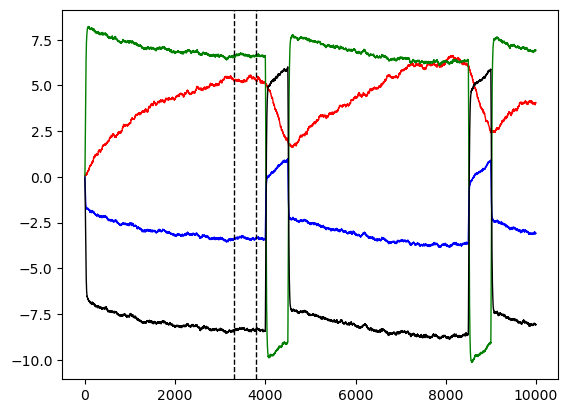

In [1]:



from toolbox import OneDModel_TBK as ODM
import importlib
importlib.reload(ODM)

Temps_ori, F, Fadv = ODM.OneDModel(wnoise_level = 0.01, bpss_reoccurence=4000, bpss_length=500, if_shift=True, lag_multiplier=1, show_figures=False)

import matplotlib.pyplot as plt
import numpy as np


# Resample by taking every 10th value along the time dimension
# Temps = Temps_ori[:, :, :, ::10]

Temps=Temps_ori

time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

plt.figure()
idx=3
# Last loop (i == 10), plot in black
plt.plot(time, Temps[idx, 0, 1, :], 'r', linewidth=1)
plt.plot(time, Temps[idx, 0, 2, :], 'g', linewidth=1)
plt.plot(time, Temps[idx, 0, 3, :], 'b', linewidth=1)
plt.plot(time, Temps[idx, 0, 4, :], 'k', linewidth=1)

# plot vertical lies at time =190 and 210
# plt.axvline(x=160, color='k', linestyle='--', linewidth=1)
# plt.axvline(x=240, color='k', linestyle='--', linewidth=1)

plt.axvline(x=3300, color='k', linestyle='--', linewidth=1)
plt.axvline(x=3800, color='k', linestyle='--', linewidth=1)

# print the shape of original data and resampled data
print(Temps_ori.shape)
print(Temps.shape)


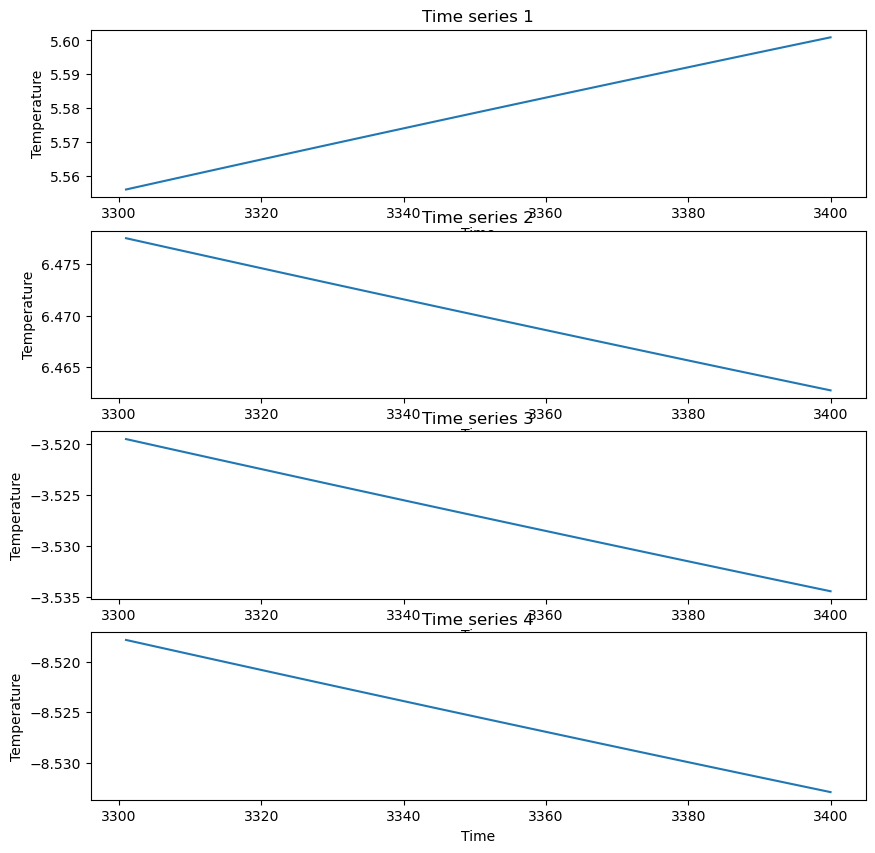

In [5]:
idx = 9  # Index of the last simulation without noise
# Convert the dictionary to an array suitable for Tigramite's DataFrame
data_array = Temps[idx, 0, 1:5, :].T.copy()



time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) )

# crop the data between time = 160 and 240
data_array = data_array[3300:3400, :]
# crop the time array between time = 160 and 240
time = time[3300:3400]

# detrend each column of the data_array using detrend function
from scipy.signal import detrend
# data_array = detrend(data_array, axis=0)


# plot the data_array time series using subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(time, data_array[:, i])
    axs[i].set_title(f"Time series {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Temperature")

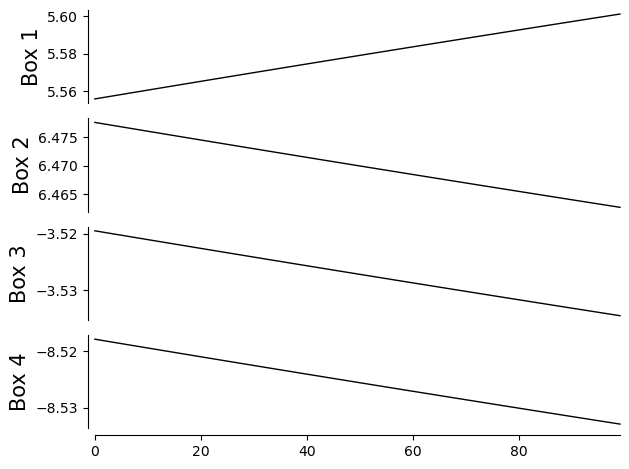

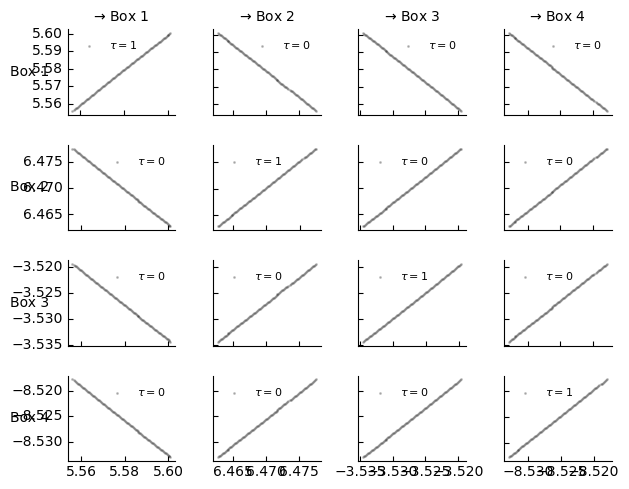


##
## Estimating lagged dependencies 
##

Parameters:

independence test = gp_dc
tau_min = 0
tau_max = 20


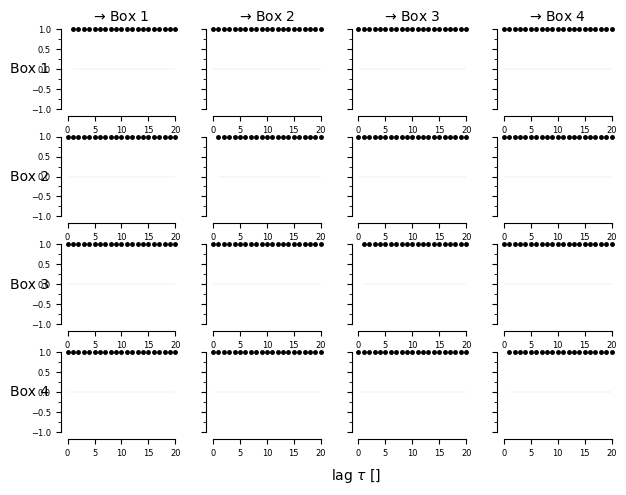


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 10
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve

KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

# idx = 4  # Index of the last simulation without noise
# Convert the dictionary to an array suitable for Tigramite's DataFrame
# data_array = Temps[idx, 0, 1:5, :].T

# Create a Tigramite DataFrame object
var_names = [f"Box {k+1}" for k in range(4)]

# create adataframe called 'df4stationary_check' with the data_array and the variable names
df4stationary_check= pd.DataFrame(data_array, columns=var_names)

dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)

import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe_TEMP, 
    cond_ind_test=gpdc_test,
    verbosity=0)

pcmci_gpdc.verbosity = 1
tau_max=10


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe_TEMP, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci_gpdc.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


results = pcmci_gpdc.run_pcmci(tau_max=tau_max, tau_min=1, pc_alpha=None, alpha_level = 0.01)

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=10,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.2
    )

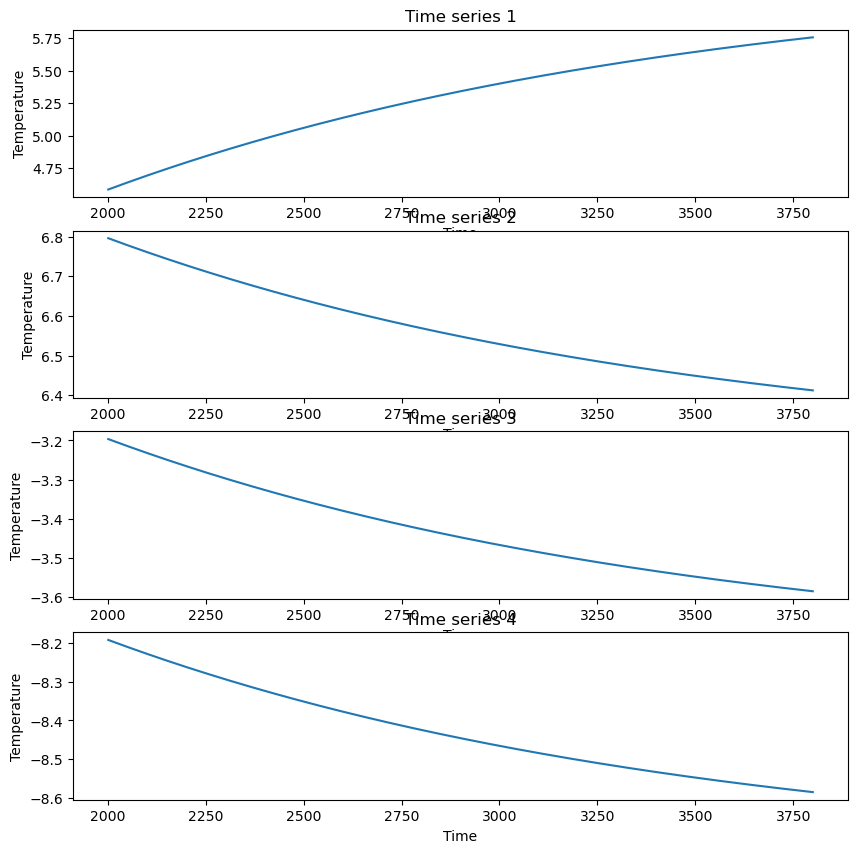

In [8]:
idx = 9  # Index of the last simulation without noise
# Convert the dictionary to an array suitable for Tigramite's DataFrame
data_array = Temps[idx, 0, 1:5, :].T.copy()



time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) )

# crop the data between time = 160 and 240
data_array = data_array[2000:3800, :]
# crop the time array between time = 160 and 240
time = time[2000:3800]

# detrend each column of the data_array using detrend function
from scipy.signal import detrend
# data_array = detrend(data_array, axis=0)


# plot the data_array time series using subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(time, data_array[:, i])
    axs[i].set_title(f"Time series {i+1}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Temperature")

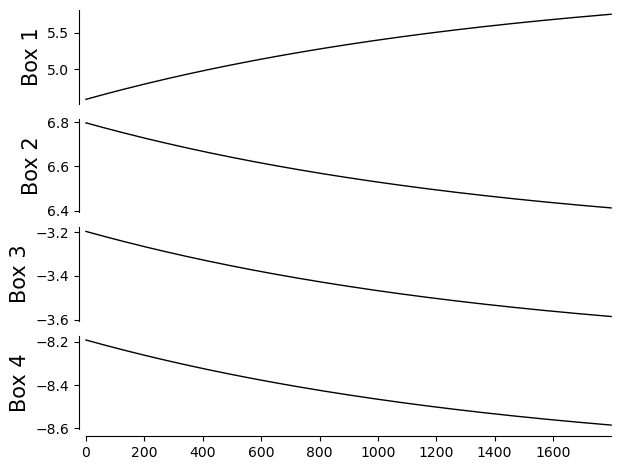

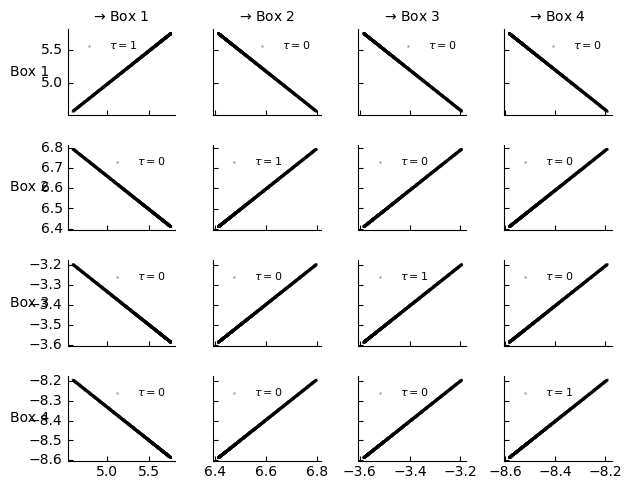


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


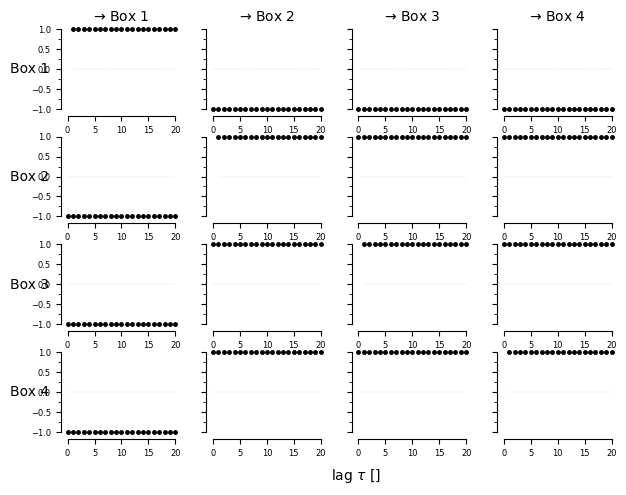


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Box 1 has 6 link(s):
    [pc_alpha = 0.1]
        (Box 1 -1): max_pval = 0.00000, |min_val| =  0.772
        (Box 4 -3): max_pval = 0.00276, |min_val| =  0.071
        (Box 1 -2): max_pval = 0.01303, |min_val| =  0.059
        (Box 2 -1): max_pval = 0.01491, |min_val| =  0.058
        (Box 1 -5): max_pval = 0.06995, |min_val| =  0.043
        (Box 1 -6): max_pval = 0.07750, |min_val| =  0.042

    Variable Box 2 has 25 link(s):
    [pc_alpha = 0.3]
        (Box 2 -1): max_pval = 0.00000, |min_val| =  0.893
        (Box 4 -6): max_pval = 0.00000, |min_val| =  0.185
        (Box 4 -8): max_pval = 0.00000, |min_val| =  0.182
        (Box 4 -7): max_pval = 0.00000, |min_val| =  0.177
        (Box 4 -3): max_pval = 0.00000,

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

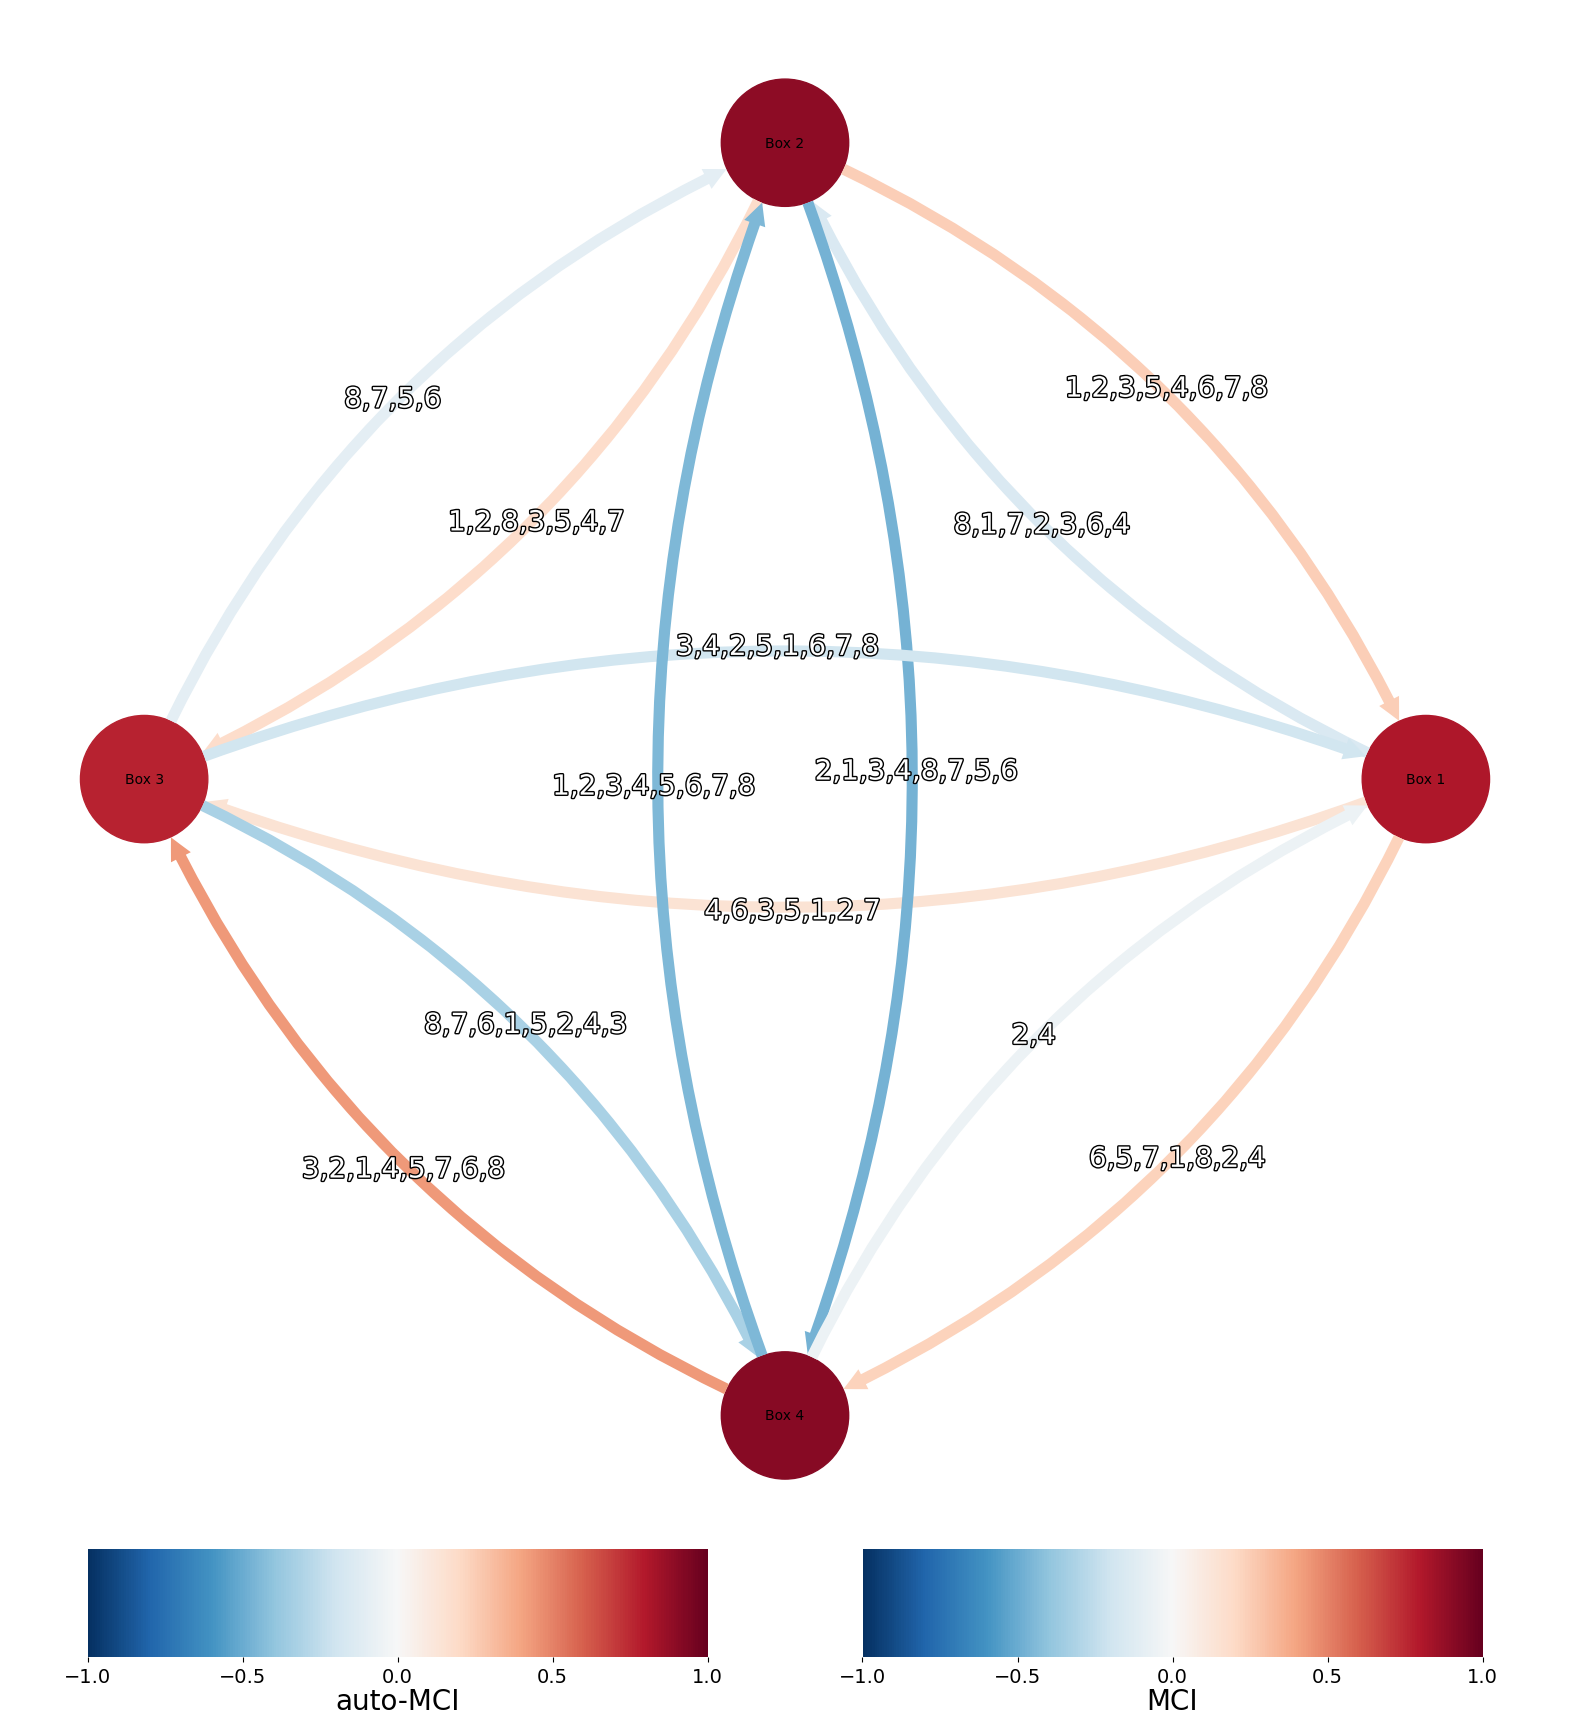

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

# Create a Tigramite DataFrame object
var_names = [f"Box {k+1}" for k in range(4)]

# create adataframe called 'df4stationary_check' with the data_array and the variable names
df4stationary_check= pd.DataFrame(data_array, columns=var_names)

dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)





ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_TEMP,
    cond_ind_test=ParCorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe_TEMP, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

pcmci.verbosity = 1
tau_min=1
tau_max=8
results = pcmci.run_pcmci(tau_min=tau_min, tau_max=tau_max, pc_alpha=None)
# q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=10,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.2
    )

(10, 1, 6, 9994)
(10, 1, 6, 9994)


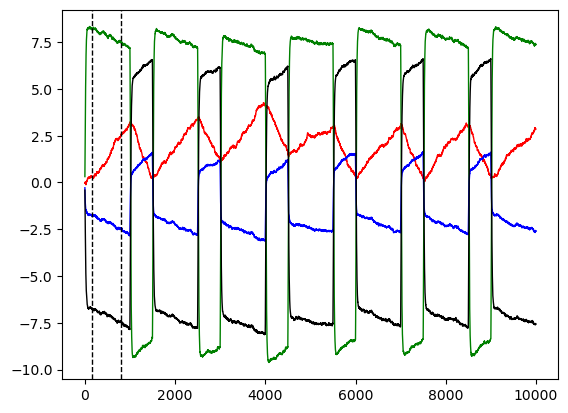

In [10]:

# from toolbox import OneDModel_TBK as ODM
# import importlib
# importlib.reload(ODM)

# Temps_ori, F, Fadv = ODM.OneDModel(wnoise_level = 0.01, runlength=1000, bpss_reoccurence=100,bpss_length=50, if_shift=True, lag_multiplier=1, show_figures=False)

# import matplotlib.pyplot as plt
# import numpy as np


# # Resample by taking every 10th value along the time dimension
# # Temps = Temps_ori[:, :, :, ::10]
# Temps = Temps_ori

# time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

# plt.figure()
# idx=4
# # Last loop (i == 10), plot in black
# plt.plot(time, Temps[idx, 0, 1, :], 'r', linewidth=1)
# plt.plot(time, Temps[idx, 0, 2, :], 'g', linewidth=1)
# plt.plot(time, Temps[idx, 0, 3, :], 'b', linewidth=1)
# plt.plot(time, Temps[idx, 0, 4, :], 'k', linewidth=1)

# plt.axvline(x=200, color='k', linestyle='--', linewidth=1)
# plt.axvline(x=240, color='k', linestyle='--', linewidth=1)

# # print the shape of original data and resampled data
# print(Temps_ori.shape)
# print(Temps.shape)












from toolbox import OneDModel_TBK as ODM
import importlib
importlib.reload(ODM)

Temps_ori, F, Fadv = ODM.OneDModel(wnoise_level = 0.01, if_shift=True, lag_multiplier=2, show_figures=False)

import matplotlib.pyplot as plt
import numpy as np


# Resample by taking every 10th value along the time dimension
# Temps = Temps_ori[:, :, :, ::10]

Temps=Temps_ori

time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) + 1)

plt.figure()
idx=3
# Last loop (i == 10), plot in black
plt.plot(time, Temps[idx, 0, 1, :], 'r', linewidth=1)
plt.plot(time, Temps[idx, 0, 2, :], 'g', linewidth=1)
plt.plot(time, Temps[idx, 0, 3, :], 'b', linewidth=1)
plt.plot(time, Temps[idx, 0, 4, :], 'k', linewidth=1)

# plot vertical lies at time =190 and 210
# plt.axvline(x=160, color='k', linestyle='--', linewidth=1)
# plt.axvline(x=240, color='k', linestyle='--', linewidth=1)

plt.axvline(x=160, color='k', linestyle='--', linewidth=1)
plt.axvline(x=800, color='k', linestyle='--', linewidth=1)

# print the shape of original data and resampled data
print(Temps_ori.shape)
print(Temps.shape)


# PCMCI for data without noise, conditional test: GPDC


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 20
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




KeyboardInterrupt: 

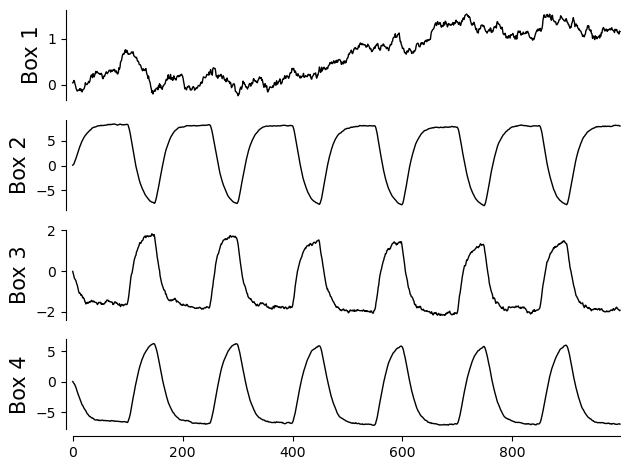

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

idx = 4  # Index of the last simulation without noise
# Convert the dictionary to an array suitable for Tigramite's DataFrame
data_array = Temps[idx, 0, 1:5, :].T

# Create a Tigramite DataFrame object
var_names = [f"Box {k+1}" for k in range(4)]

# create adataframe called 'df4stationary_check' with the data_array and the variable names
df4stationary_check= pd.DataFrame(data_array, columns=var_names)

dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)

import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe_TEMP, 
    cond_ind_test=gpdc_test,
    verbosity=0)

pcmci_gpdc.verbosity = 1
tau_max=20

results = pcmci_gpdc.run_pcmci(tau_max=tau_max, tau_min=1, pc_alpha=None, alpha_level = 0.01)

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=10,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.2
    )

Text(0, 0.5, 'Temperature')

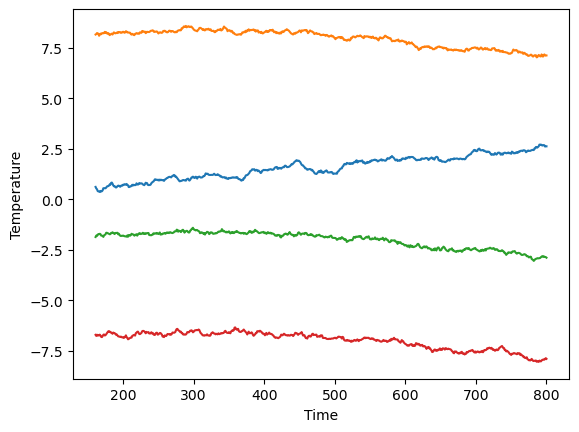

In [13]:
idx = 4  # Index of the last simulation without noise
# Convert the dictionary to an array suitable for Tigramite's DataFrame
data_array = Temps[idx, 0, 1:5, :].T.copy()



# # For data_array, for the first column, replace it with its derivative
# first_col_diff = np.diff(data_array[:, 0])
# # drop the last row of data_array
# data_array = data_array[:-1, :]
# data_array[:, 0] = first_col_diff

time = np.arange(1, len(np.squeeze(Temps[0, 0, 1, :])) )

# crop the data between time = 160 and 240
data_array = data_array[160:800, :]
# crop the time array between time = 160 and 240
time = time[160:800]

# detrend each column of the data_array using detrend function
from scipy.signal import detrend
# data_array = detrend(data_array, axis=0)


# plot the data_array time series
import matplotlib.pyplot as plt
plt.plot(time, data_array)
plt.xlabel('Time')
plt.ylabel('Temperature')


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 7
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)



## Resulting lagged parent (super)sets:

    Variable Box 1 has 2 link(s):
    [pc_alpha = 0.1]
        (Box 1 -1): max_pval = 0.00000, |min_val| =  0.671
        (Box 1 -4): max_pval = 0.08200, |min_val| =  0.085

    Variable Box 2 has 4 link(s):
    [pc_alpha = 0.1]
        (Box 2 -1): max_pval = 0.00000, |min_val| =  0.609
        (Box 2 -3): max_pval = 0.01400, |min_val| =  0.105
        (Box 3 -1): max_pval = 0.06000, |min_val| =  0.090
        (Box 3 -3): max_pval = 0.10000, |min_val| =  0.082

    Variable Box 3 has 3 link(s):
    [pc_alpha = 0.05]
        (Box 3 -1): max_pval = 0.00000, |min_val| =  0.629
        (Box 4 -1): max_pval = 0.00000, |min_val| =  0.166
        (Box 2 -1): max_pval = 0.01400, |min_val| =  0.107

    Variable Box 4 has 2 link(s):
    [pc_alpha = 0.05]
        (Box 4 -1): max_pval = 0.00000, |min_val| =  0.640
        (Box 3 -1): max_pval = 0.00200, |min_val| =  0.161

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1


(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

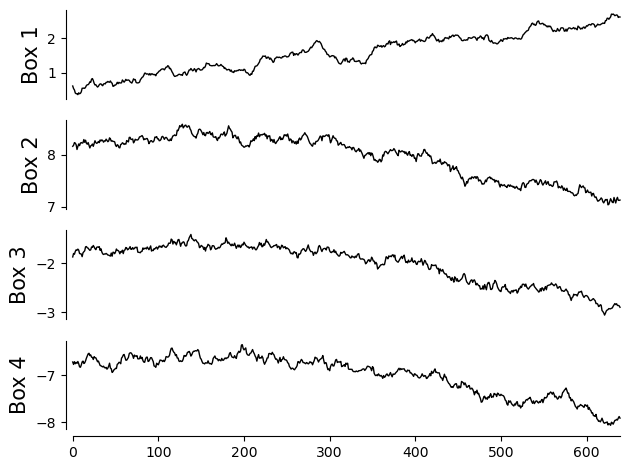

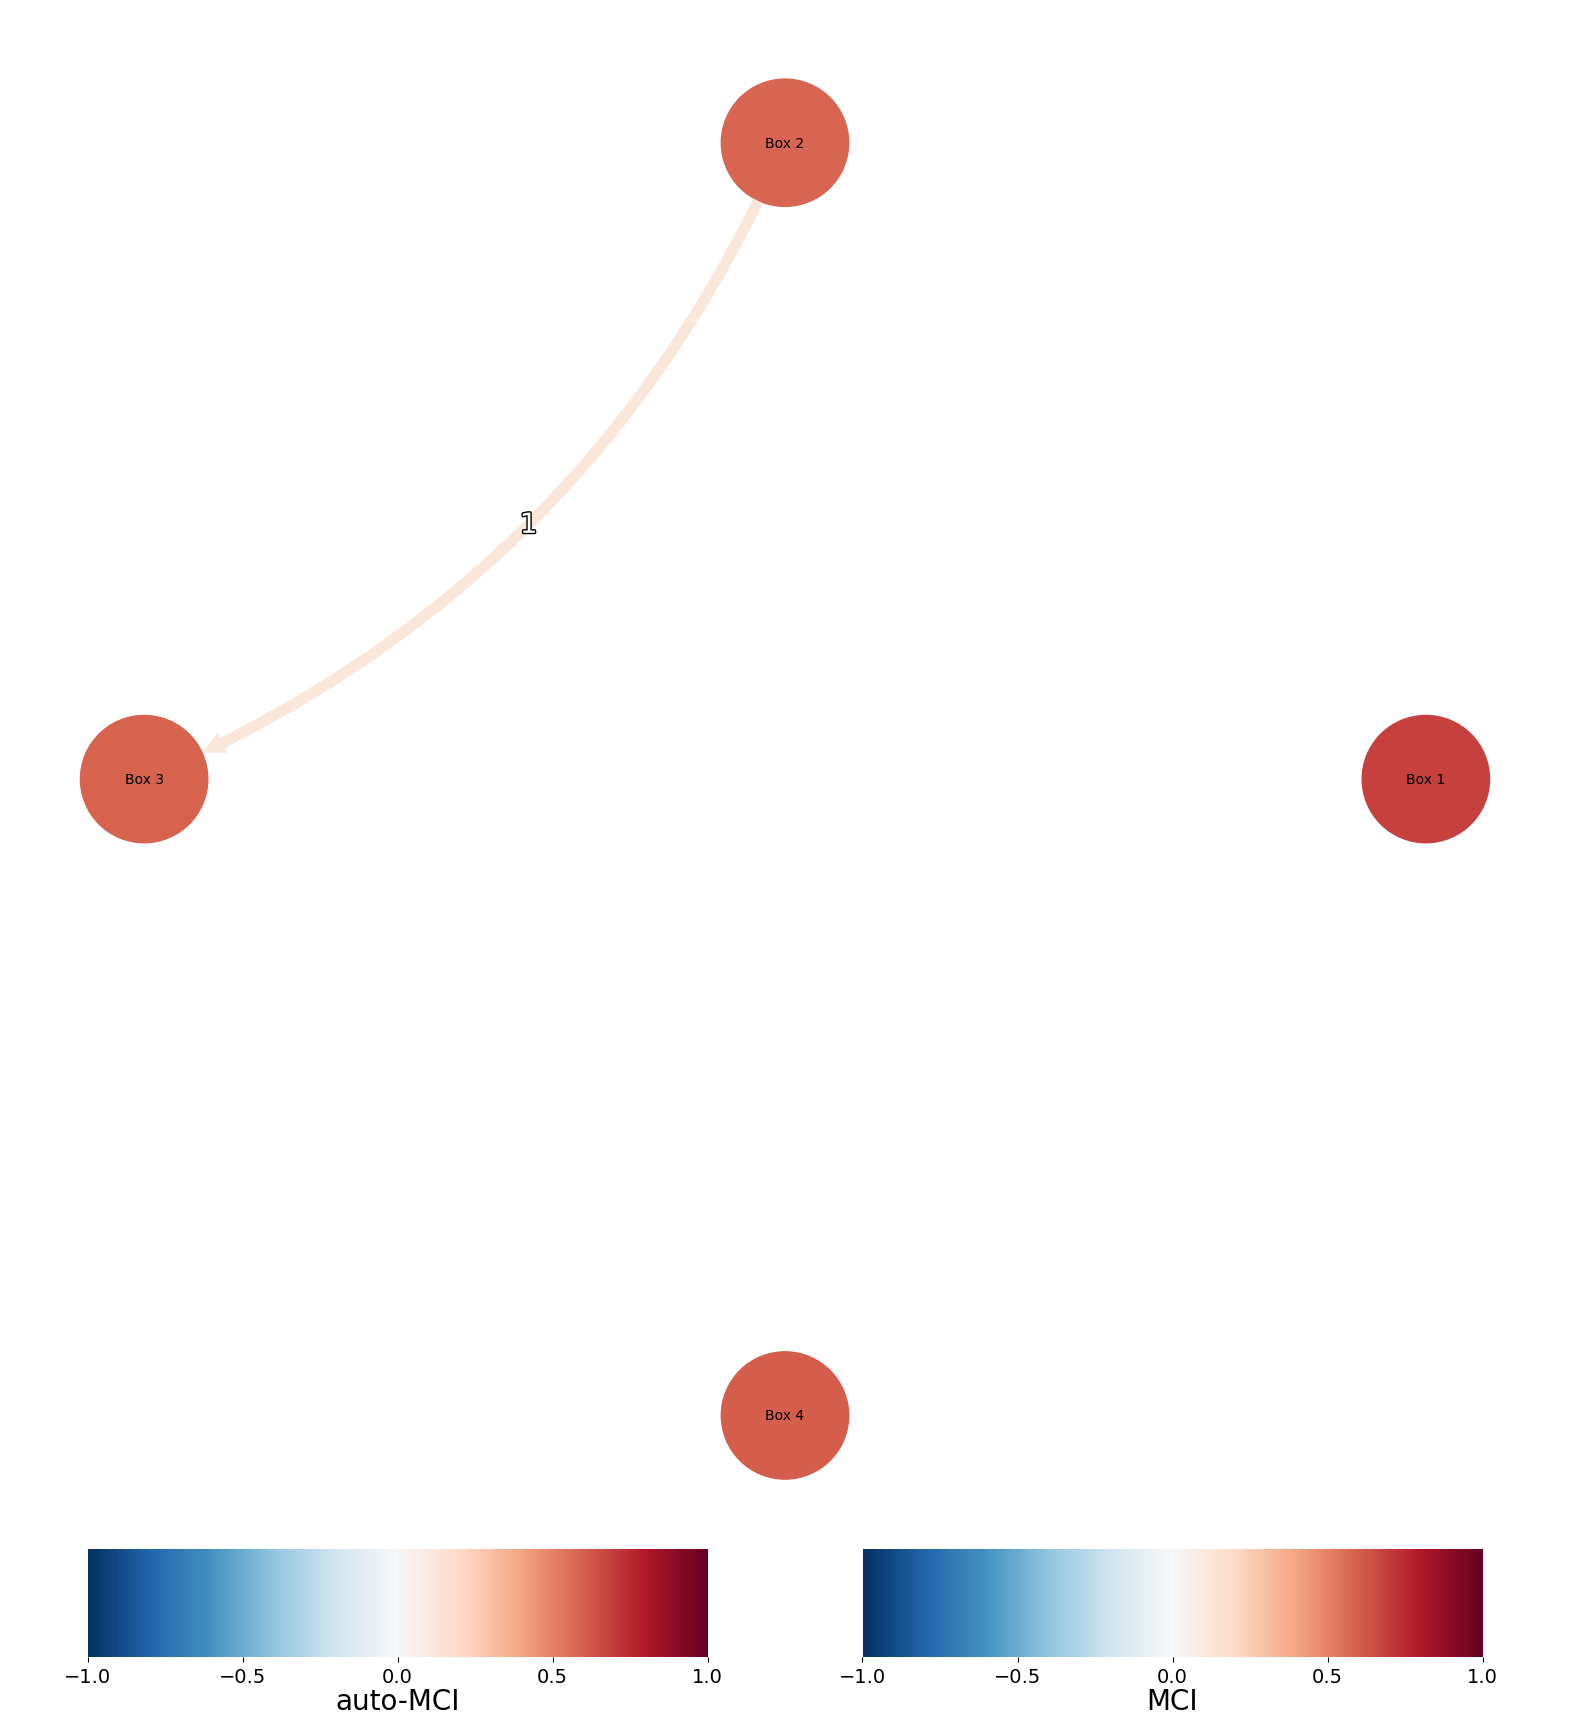

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


# Create a Tigramite DataFrame object
var_names = [f"Box {k+1}" for k in range(4)]

# create adataframe called 'df4stationary_check' with the data_array and the variable names
df4stationary_check= pd.DataFrame(data_array, columns=var_names)

dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)

import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe_TEMP, 
    cond_ind_test=gpdc_test,
    verbosity=0)

pcmci_gpdc.verbosity = 1
tau_max=7

results = pcmci_gpdc.run_pcmci(tau_max=tau_max, tau_min=1, pc_alpha=None, alpha_level = 0.01)

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=10,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.2
    )